<a href="https://colab.research.google.com/github/palisthadeshar/Bank-Loan-Classification/blob/main/Bank_Loan_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [168]:
#importing excel sheet having data
# read_data = pd.read_excel('Bank_loan_data.xlsx','Data')
from google.colab import files
uploaded = files.upload()
loan_data = pd.read_excel(list(uploaded.keys())[0])


Saving Bank_loan_data (2).xlsx to Bank_loan_data (2) (5).xlsx


In [169]:
#visualizing the data
loan_data.head(20)

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1
5,6,37,M,13,29.0,92121,4,0.4,2,155,Rent,0,0,0,1.0,0
6,7,53,M,27,72.0,91711,2,1.5,2,0,Rent,0,0,0,1.0,0
7,8,50,M,24,22.0,93943,1,0.3,3,0,Rent,0,0,0,0.0,1
8,9,35,M,10,81.0,90089,3,0.6,2,104,Rent,0,0,0,1.0,0
9,10,34,M,9,180.0,93023,1,8.9,3,0,Home Owner,1,0,0,0.0,0


In [170]:
#checking number of rows and columns in the dataset
loan_data.shape

(5000, 16)

In [171]:
#checking the columns
loan_data.keys()

Index(['ID', 'Age', 'Gender', 'Experience', 'Income', 'ZIP Code', 'Family',
       'CCAvg', 'Education', 'Mortgage', 'Home Ownership', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [172]:
#dropping unnecessary columns
loan_data = loan_data.drop(['ID','ZIP Code'], axis = 1)

In [173]:
#check for null values
loan_data.isna().sum()

Age                      0
Gender                1596
Experience               0
Income                  67
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

<Axes: >

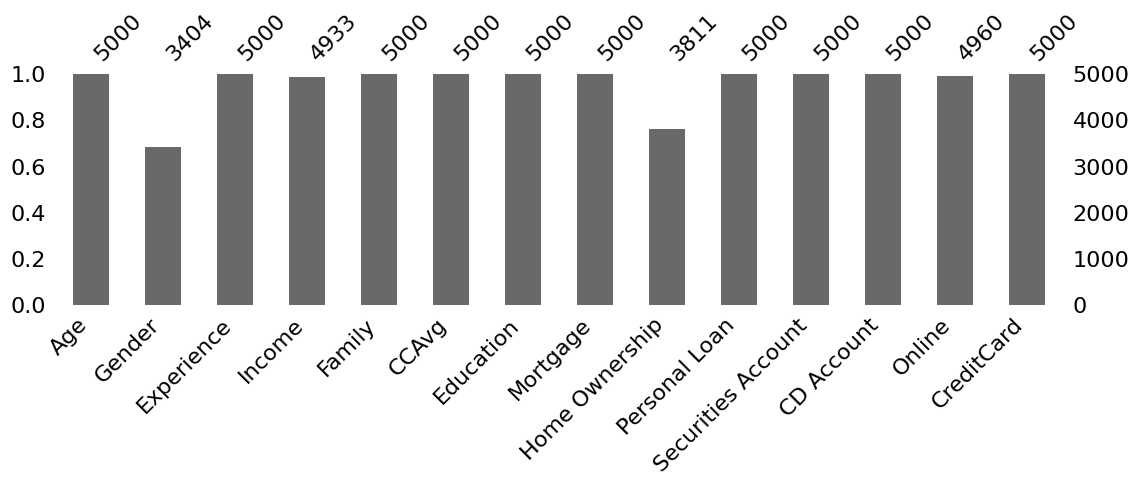

In [179]:
#checking missing values with mean and median using missingno package
msno.bar(loan_data,figsize=(13,3))

In [180]:
#dropping columns having too much null values
loan_data = loan_data.drop(['Gender'], axis = 1)

In [181]:
#replacing null values with mean
loan_data['Income'].fillna(loan_data['Income'].mean(), inplace=True)

In [182]:
# replacing null value for categorical data using imputer
impute_mode = SimpleImputer(strategy = 'most_frequent')
impute_mode.fit(loan_data[['Online']])
loan_data[['Online']] = impute_mode.transform(loan_data[['Online']])

In [183]:
# replacing null value for categorical data using imputer
impute_mode = SimpleImputer(strategy = 'most_frequent')
impute_mode.fit(loan_data[['Home Ownership']])
loan_data[['Home Ownership']] = impute_mode.transform(loan_data[['Home Ownership']])

In [184]:
#checking null values
loan_data.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Home Ownership        0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [185]:
#check for categorical data
cat_data = (loan_data.dtypes == 'object')
print(cat_data)

Age                   False
Experience            False
Income                False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Home Ownership         True
Personal Loan          True
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool


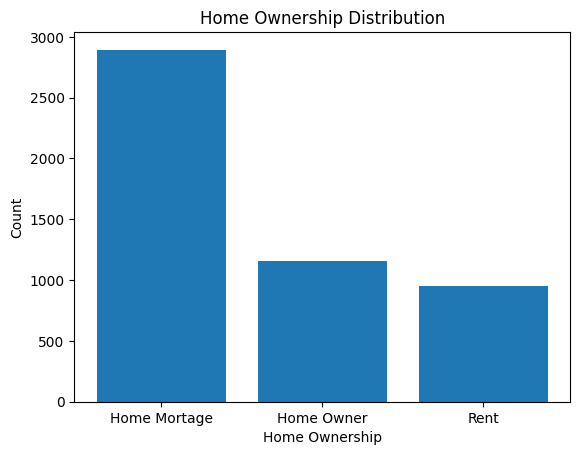

In [187]:
# Get count of each category
count = loan_data['Home Ownership'].value_counts()
plt.bar(count.index, count.values)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Home Ownership Distribution')
plt.show()

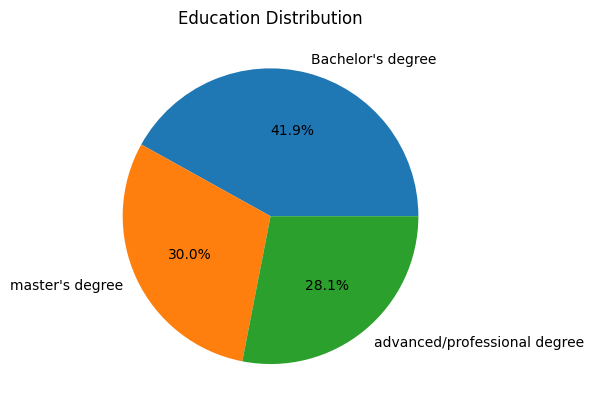

In [188]:
#pie chart to show number of counts of education degree
count = loan_data['Education'].value_counts()
#assigning labels
label_names = ['Bachelor\'s degree', 'master\'s degree', 'advanced/professional degree']
# Plotting pie chart
plt.pie(count.values, labels=label_names, autopct='%1.1f%%')
plt.title('Education Distribution')
plt.show()

In [189]:
#checking categorical data
loan_data['Home Ownership'].unique()

array(['Home Owner', 'Rent', 'Home Mortage'], dtype=object)

In [190]:
#converting categorical data into numerical format
mapping = {'Home Owner': 1, 'Rent': 2, 'Home Mortage': 3}

# Replace the categorical column with numerical values
loan_data['Home Ownership'] = loan_data['Home Ownership'].replace(mapping)

In [191]:
#checking for duplicate rows
loan_data[loan_data.duplicated()]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
2031,60,35,80.0,3,0.5,1,0,3,0,0,0,1.0,0
4616,66,41,114.0,1,0.8,3,0,3,0,0,0,1.0,1
4744,44,20,72.0,3,0.3,3,0,3,0,0,0,1.0,0
4746,31,7,18.0,1,0.4,3,0,3,0,0,0,1.0,0


In [192]:
#dropping the duplicate rows
loan_data = loan_data.drop_duplicates()

In [193]:
#checking the shape of data after deleting duplicate rows
loan_data.shape

(4996, 13)

In [194]:
#checking for unique label values
loan_data['Personal Loan'].unique()

array([0, 1, ' '], dtype=object)

In [195]:
#checking number of values for label
loan_data['Personal Loan'].value_counts()

0    4516
1     479
        1
Name: Personal Loan, dtype: int64

In [196]:
#dropping the null label
loan_data = loan_data.drop(loan_data[loan_data['Personal Loan'] == ' '].index)

In [197]:
loan_data['Personal Loan'].value_counts()

0    4516
1     479
Name: Personal Loan, dtype: int64

In [198]:
loan_data.keys()

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Home Ownership', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

<Axes: >

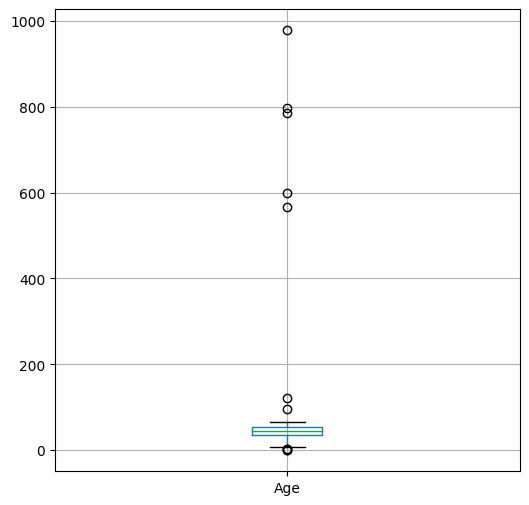

In [199]:
#using box plot to detect outliers
df = pd.DataFrame(loan_data, columns = ['Age'])
plt.figure(figsize = (6, 6))
df.boxplot()

In [200]:
#replacing outlier with null values
loan_data['Age'].loc[(loan_data['Age'] < 18) | (loan_data['Age'] > 80)] = np.nan

<ipython-input-200-f0595659a1c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['Age'].loc[(loan_data['Age'] < 18) | (loan_data['Age'] > 80)] = np.nan


In [201]:
#replacing null data with mean
loan_data['Age'].fillna(loan_data['Age'].mean(), inplace=True)

<ipython-input-202-db5744390682>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_data.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)


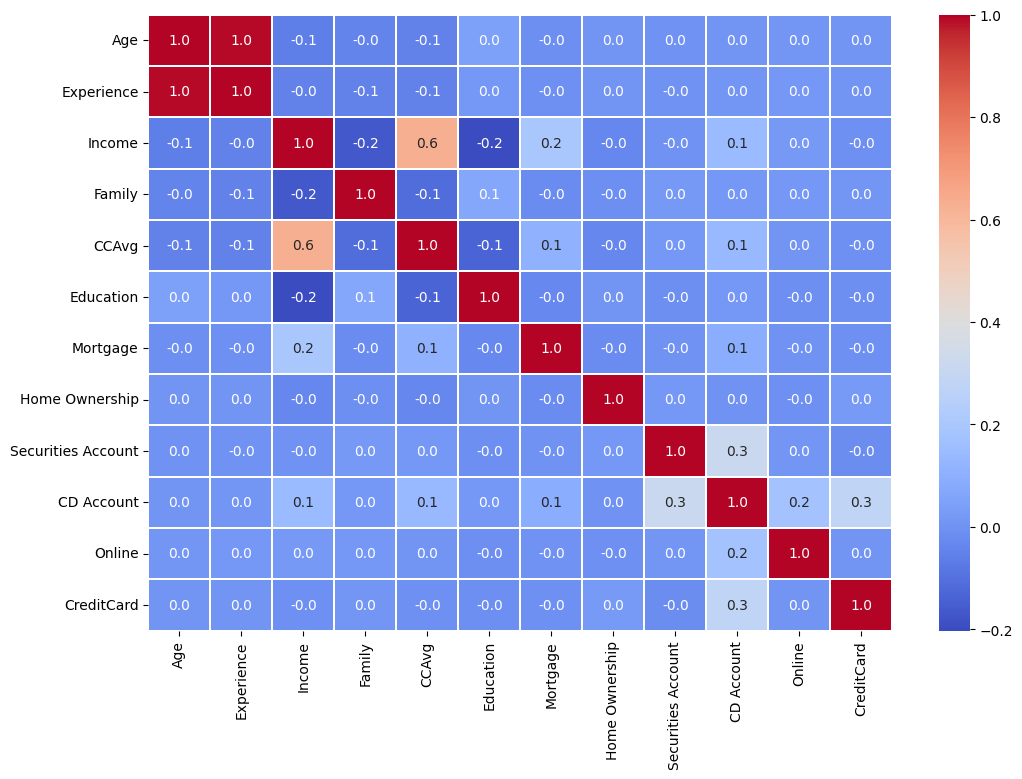

In [202]:
#plotting heatmap to check relationship between the variables
plt.figure(figsize=(12,8))
sns.heatmap(loan_data.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

Train Test Split

In [203]:
#dividing dataset into features and label
X = loan_data.drop(['Personal Loan'],axis=1)
y = loan_data['Personal Loan']


In [204]:
#checking for all the labels present into the dataset
loan_data['Personal Loan'].unique()

array([0, 1], dtype=object)

In [205]:
#converting label to int
y = y.astype('int')

In [206]:
#feature scaling the data
from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler()
X = scale_features_std.fit_transform(X)

In [207]:
#splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Training the ML model

In [208]:
#model building
logistic_model = LogisticRegression()

In [209]:
#model training
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [210]:
#checking accuracy of the model
y_pred = logistic_model.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Logistic Regression model accuracy",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Logistic Regression model accuracy 93.99519615692554
Precision: 0.9344235070112576
Recall: 0.9399519615692554
F1-score: 0.9348528114186887


In [211]:
#making predictions
pred_data = [[35,10,1,3,0.20,2,0,450,1,1,0,0]]
output = logistic_model.predict(pred_data)
print(output)

[0]


In [212]:
import joblib
# Save the model using joblib
from google.colab import drive
drive.mount('/content/gdrive')
filename = 'logistic_regression_model.sav'
path = F"/content/gdrive/My Drive/{filename}"
joblib.dump(logistic_model, path)



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['/content/gdrive/My Drive/logistic_regression_model.sav']

In [213]:
#loading the saved model for predictions
model=joblib.load('logistic_regression_model.sav')
res=model.predict([[35,10,1,3,0.20,2,0,450,1,1,0,0]])
print(res)

[0]


In [166]:
#make prediction using saved model in drive
model_name = 'logistic_regression_model.sav'
path = F"/content/gdrive/My Drive/{model_name}"
model=joblib.load(path)
res=model.predict([[35,110,1,1,0.70,2,0,0,0,0,0,0]])
print(res)

[1]


Using SVM

In [146]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy using SVC:", metrics.accuracy_score(y_test, y_pred)*100)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy using SVC: 94.63570856685348
Precision: 0.9428778824968198
Recall: 0.9463570856685348
F1-score: 0.9402331537985492


In [147]:
#make prediction using trained model
pred_data = [[35,10,194,3,0.20,2,200,2,1,1,1,0]]
output = clf.predict(pred_data)
print(output)

[1]


In [155]:
#make prediction with trained model
model=joblib.load('svm_model.sav')
res=model.predict([[35,110,1,1,0.70,2,0,0,0,0,0,0]])
print(res)

[1]


In [ ]:
#save the model
filename = 'svm_model.sav'
path = F"/content/gdrive/My Drive/{filename}"
joblib.dump(clf, path)

In [165]:
#load the model from drive nad making predictions
model_name = 'svm_model.sav'
path = F"/content/gdrive/My Drive/{model_name}"
model=joblib.load(path)
res=model.predict([[35,110,1,1,0.70,2,0,0,0,0,0,0]])
print(res)

[1]
